In [2]:
import numpy as np
import pandas as pd

First, load Hospital sample into a data frame

In [4]:
hospital = pd.read_csv("../Data/hospital_sample.csv")
hospital.head(2)

,Hospital Name,State,AMI_Death_Rate,CABG_Death_Rate,Stroke_Death_Rate,Hospital Ownership,Emergency Service,Customer Survey Score,Survey Date
0,AHMC ANAHEIM REGIONAL MEDICAL CENTER,CA,13.6,3.2,15.0,Voluntary non-profit - Private,Yes,27,4/5/2019
1,ST MARY MEDICAL CENTER,CA,12.9,2.6,12.0,Voluntary non-profit - Church,Yes,59,4/6/2019


In [22]:
hospital.columns.to_list()

['Hospital Name',
 'State',
 'AMI_Death_Rate',
 'CABG_Death_Rate',
 'Stroke_Death_Rate',
 'Hospital Ownership',
 'Emergency Service',
 'Customer Survey Score',
 'Survey Date',
 'Avg_Death_Rate']

How many states are presented in the data
How many hospitals are there in each state?

In [6]:
len(hospital.State.unique())

3

Which hospital has the highest death rate? Save that in a new column called Avg_Death_Rate
(You may define worst as highest avg death rate among AMI, CABG, Stroke)

In [14]:
hospital['Avg_Death_Rate'] = (
    hospital.AMI_Death_Rate + hospital.CABG_Death_Rate + hospital.Stroke_Death_Rate)/3

In [15]:
hospital[hospital.Avg_Death_Rate == hospital.Avg_Death_Rate.max()]['Hospital Name']

51    DESERT REGIONAL MEDICAL CENTER
Name: Hospital Name, dtype: object

What is the most popular ownership type?

In [19]:
hospital['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 66
Proprietary                                    43
Voluntary non-profit - Church                  29
Government - Hospital District or Authority    18
Voluntary non-profit - Other                   16
Government - Local                              4
Government - Federal                            2
Government - State                              1
Name: Hospital Ownership, dtype: int64

**Based on the above, Voluntary non-profit - Private is the most popular ownership**

For each state, what's highest survey score?

In [27]:
hospital['Customer Survey Score'].values.max()

78

In [24]:
hospital.groupby('State')['Customer Survey Score'].aggregate('max')

State
CA    67
CO    55
FL    78
Name: Customer Survey Score, dtype: int64

Now you know the max score of each state, find the hospital name with these scores


In [36]:
hospital.query("(`Customer Survey Score`== 67 & State=='CA') | (`Customer Survey Score`== 55 & State=='CO') |(`Customer Survey Score`== 78 & State=='FL') ")['Hospital Name']

68                               SHARP MEMORIAL HOSPITAL
69     CALIFORNIA PACIFIC MEDICAL CTR-PACIFIC CAMPUS ...
104                        MEDICAL CENTER OF THE ROCKIES
132                                          MAYO CLINIC
Name: Hospital Name, dtype: object

How many surveys do we have per month? plot it into a bar chart

**Hint:** you may use function 
  
  
df['month'] = pd.DatetimeIndex(df['Survey_Date']).month

for value_counts, you may use sort = False to avoid sorting

In [44]:
import matplotlib.pyplot as plt
from datetime import datetime


In [47]:
hospital['month'] = pd.DatetimeIndex(hospital['Survey Date']).month


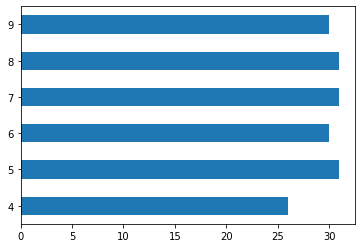

In [57]:
hospital.month.value_counts(sort=False).plot(kind='barh')